In [2]:
import os
import numpy as np
import matplotlib.pylab as plt
plt.rcParams.update({'font.size': 12})

import cristalo as cr

# Load data

In [3]:
def pad_and_norm(data):
    ''' Add the interpolated psi-scan lines
        (corresponding to phi=0 and phi=360 deg)
        
        prevent gap in the polar plot
    '''
    missing_phi = (data[0, :] + data[-1, :])/2
    newdata = np.vstack([missing_phi.T, data, missing_phi.T])
    
    # norm
    newdata = (newdata-newdata.min())/(newdata.max()-newdata.min())
    #newdata = np.sqrt(newdata)
    return newdata

In [4]:
# List the .csv files in directory
data_dir = './arb16nm/'
data_dir = './pvd_Si/'

filenames = sorted([data_dir+name for name in os.listdir(data_dir)
                    if name.endswith('.csv')])
print(filenames)

# Build a dictionary of all the data
def get_path(filename):
    return data_dir + filename

filepaths = [data_dir+name for name in filenames]

all_data = {filename: np.genfromtxt(filename,
                                    skip_header=31, delimiter=',')
            for filename in filenames}

['./pvd_Si/FigurePole_PVDSi_Cu002.csv', './pvd_Si/FigurePole_PVDSi_Cu022.csv', './pvd_Si/FigurePole_PVDSi_Cu111.csv', './pvd_Si/FigurePole_PVDSi_Nb011.csv', './pvd_Si/FigurePole_PVDSi_Nb022.csv']


# Tools to create plots

In [5]:
def create_fig():
    psi = np.arange(0, 85+1, 5)
    psi_stereo = 2*np.tan(psi*np.pi/180 / 2) # Stereographic projection


    fig = plt.figure(figsize=(6, 6));
    ax = fig.add_subplot(111, projection='polar');

    ax.set_rmin(0)
    ax.set_rorigin(-0.01)
    ax.set_ylim((0, 2))
    ax.set_yticks(psi_stereo[::3])
    ax.set_yticklabels([f'{a}°' for a in psi[::3]],
                       alpha=0.4, color='black')
    ax.grid(True, alpha=0.4, color='black')

    return fig, ax


def annotate(ax, phi, psi, hkl, color='k', marker='s', fontweight='normal'):
    hkl_name = '%s%s%s' % tuple(hkl)
    psi_stereo = 2*np.tan(psi*np.pi/180 / 2) # Stereographic projection
    psi_stereo_annotate = psi_stereo if psi_stereo>0.1 else 0.1 
    
    phi_annotate = phi if np.abs(phi)>1 else 1
    phi_annotate = phi_annotate if np.abs(np.abs(phi_annotate)-180)>1 else 179 
    
    if psi_stereo>2:
        print(hkl, psi_stereo, psi)
    
    ax.plot(phi *np.pi/180, psi_stereo, marker=marker, color=color)
    ax.annotate(hkl_name, (phi_annotate *np.pi/180, psi_stereo),
               textcoords='offset pixels', xytext=(0, -15),
               rotation=0, alpha=0.9, color=color, family='sans-serif',
               horizontalalignment='center', va='baseline', weight=fontweight) 
    
    
#phi = np.arange(2.5, 360+1, 5)
phi_padded = np.arange(0, 361+5, 5)

In [6]:
len( cr.equivalent_directions((1, 2, 3)) )

48

hkl 	 phi  	 psi 
-------------------------
111 	 270°  	  19° 
1-11 	  22°  	  62° 
-111 	 158°  	  62° 
113 	  90°  	  10° 
1-13 	  51°  	  42° 
3-11 	 348°  	  61° 
31-1 	 296°  	  76° 
-113 	 129°  	  42° 
131 	 231°  	  42° 
13-1 	 244°  	  76° 
133 	 202°  	  21° 
3-13 	  12°  	  41° 
33-1 	 270°  	  68° 
002 	  90°  	  35° 
020 	 219°  	  66° 
200 	 321°  	  66° 
220 	 270°  	  55° 
202 	 360°  	  30° 
0-22 	  59°  	  73° 
022 	 180°  	  30° 
-202 	 121°  	  73° 
222 	 270°  	  19° 
2-22 	  22°  	  62° 
-222 	 158°  	  62° 


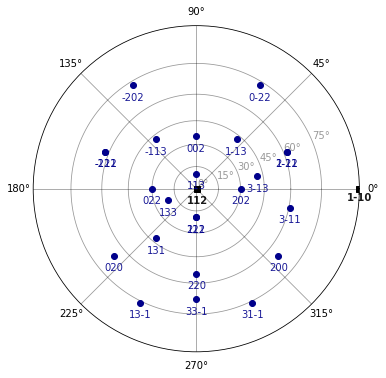

In [8]:
# Define the cristal orientation
n = (1, 1, 2)      # sample surface normal direction
phi0 = (1, -1, 0)  # direction corresponding to phi=0 (X axis)
dirs = [n, phi0]

fig, ax = create_fig();

# add sample axis:
annotate(ax, *cr.get_phi_psi(n, n, phi0), n,
         color='black', marker='s', fontweight='bold')
annotate(ax, *cr.get_phi_psi(phi0, n, phi0), phi0,
         color='black', marker='s', fontweight='bold')

# directions
#dirs = cr.equivalent_directions(hkl_eq)
dirs = [(1, 1, 1), (1, -1, 1), (-1, 1, 1),
        (1, 1, 3), (1, -1, 3), (3, -1, 1), (3, 1, -1), (-1, 1, 3), (1, 3, 1), (1, 3, -1),
        (1, 3, 3), (3, -1, 3), (3, 3, -1),
        (0, 0, 2), (0, 2, 0), (2, 0, 0),
        (2, 2, 0), (2, 0, 2), (0, -2, 2), (0, 2, 2), (-2, 0, 2),
        (2, 2, 2), (2, -2, 2), (-2, 2, 2)]


print('hkl', f'\t phi ', f'\t psi ')#, 'multiplicity ')
print('-'*25)
for hkl in dirs:
    phi, psi = cr.get_phi_psi(hkl, n, phi0)
    annotate(ax, phi, psi, hkl,
             color='darkblue', marker='o')
    
    hkl_name = '%s%s%s' % tuple(hkl)
    multiplicity = 48/len(cr.equivalent_directions(hkl))
    
    phi = phi if phi > 0 else 360+phi
    print(hkl_name, f'\t{phi:>4.0f}° ', f'\t{psi:>4.0f}° ')#, f'{multiplicity:>2.0f}')

hkl 	 phi  	 psi 
-------------------------
011 	 102°  	  31° 
110 	 180°  	  62° 
-101 	  33°  	  67° 
101 	 258°  	  31° 
0-11 	 327°  	  67° 
002 	 360°  	  28° 
020 	 131°  	  71° 
200 	 229°  	  71° 
112 	 180°  	   7° 
1-21 	 297°  	  77° 
-112 	  56°  	  44° 
-121 	  94°  	  60° 
-1-12 	 360°  	  63° 
121 	 153°  	  40° 
211 	 207°  	  40° 
2-11 	 266°  	  60° 
222 	 180°  	  27° 
-222 	  72°  	  59° 
2-22 	 288°  	  59° 
123 	 124°  	  13° 
-123 	  70°  	  37° 
132 	 138°  	  34° 
312 	 222°  	  34° 
2-13 	 290°  	  37° 
1-23 	 314°  	  52° 
-132 	  96°  	  50° 
-231 	  93°  	  71° 
321 	 195°  	  47° 


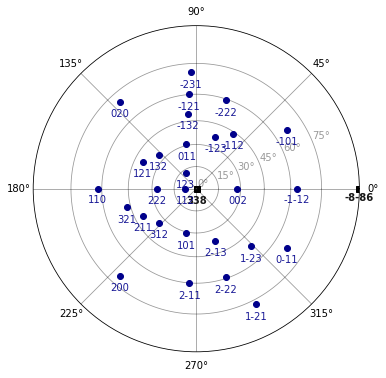

In [9]:
# Define the cristal orientation
n = (3, 3, 8)
phi0 = (-8, -8, 6)
dirs = [n, phi0]

fig, ax = create_fig();

# add sample axis:
annotate(ax, *cr.get_phi_psi(n, n, phi0), n,
         color='black', marker='s', fontweight='bold')
annotate(ax, *cr.get_phi_psi(phi0, n, phi0), phi0,
         color='black', marker='s', fontweight='bold')

# directions
#dirs = cr.equivalent_directions(hkl_eq)
dirs = [(0, 1, 1), (1, 1, 0), (-1, 0, 1), (1, 0, 1), (0, -1, 1),
        (0, 0, 2), (0, 2, 0), (2, 0, 0),
        (1, 1, 2), (1, -2, 1), (-1, 1, 2), (-1, 2, 1), (-1, -1, 2), (1, 2, 1), (2, 1, 1), (2, -1, 1),
        (2, 2, 2), (-2, 2, 2), (2, -2, 2),
        (1, 2, 3), (-1, 2, 3), (1, 3, 2), (3, 1, 2), (2, -1, 3), (1, -2, 3), (-1, 3, 2), (-2, 3, 1), (3, 2, 1)]


print('hkl', f'\t phi ', f'\t psi ')#, 'multiplicity ')
print('-'*25)
for hkl in dirs:
    phi, psi = cr.get_phi_psi(hkl, n, phi0)
    annotate(ax, phi, psi, hkl,
             color='darkblue', marker='o')
    
    hkl_name = '%s%s%s' % tuple(hkl)
    multiplicity = 48/len(cr.equivalent_directions(hkl))
    phi = phi if phi > 0 else 360+phi
    print(hkl_name, f'\t{phi:>4.0f}° ', f'\t{psi:>4.0f}° ')#, f'{multiplicity:>2.0f}')

./pvd_Si/FigurePole_PVDSi_Nb011.csv


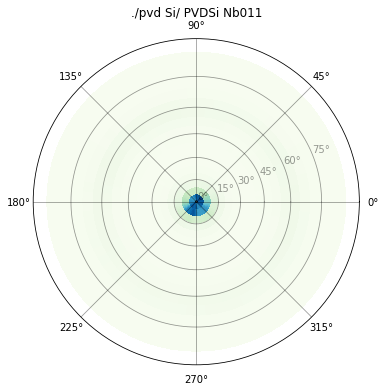

In [277]:
filename = [name for name in filenames if 'Nb011' in name][0]

print(filename)

data = all_data[filename]
data_normed = pad_and_norm(data)

colormap = 'YlOrRd' if 'Cu' in filename else 'GnBu'

fig, ax = create_fig();

psi = np.arange(0, 85+1, 5)
psi_stereo = 2*np.tan(psi*np.pi/180 / 2) # Stereographic projection
#phi = np.arange(2.5, 360+1, 5)
phi_padded = np.arange(0, 361+5, 5)
ax.pcolormesh(phi_padded*np.pi/180, psi_stereo, data_normed.T,
              cmap=colormap, shading='flat')#'gouraud')

plt.title(filename.replace('.csv', '').replace('FigurePole', '').replace('_', ' '))
ax.grid(True, alpha=0.4, color='black')

In [278]:
!grep "Time per step" "{filename}"

Time per step,30.00


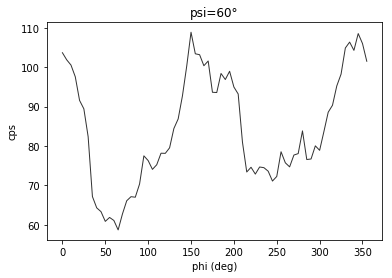

In [251]:
dt = 30 # seconds
psi_select = 60

phi_span = np.arange(0, 360, 5)
plt.plot(phi_span, data[:, psi==psi_select]/dt, 'k',
         alpha=0.8, linewidth=1);
#plt.plot(phi_padded, data[:, phi_padded==55], 'k', alpha=0.1, linewidth=1);

#plt.plot(psi, data.T[:, phi_padded==35], 'k', alpha=0.1, linewidth=1);
#plt.plot(psi, data.T[:, :], 'k', alpha=0.1, linewidth=1);
plt.xlabel('phi (deg)')
plt.ylabel('cps'); plt.title('psi=%d°'%psi_select);
#plt.ylim(0, 10000)

In [188]:
np.max(data)/dt

2571.266666666667

In [189]:
formule = "(1/0,872263126107)*((2,31540385045E-11*A2^6)-(0,00000000582786748594*A2^5)+(0,000000526056222328*A2^4)-(0,0000178942658493*A2^3)+(0,0000263380900527*A2^2)-(0,00454396094621*A2)+0,872263126107)"
formule.replace(',', '.').replace('^', '**').replace('A2', 'psi')

'(1/0.872263126107)*((2.31540385045E-11*psi**6)-(0.00000000582786748594*psi**5)+(0.000000526056222328*psi**4)-(0.0000178942658493*psi**3)+(0.0000263380900527*psi**2)-(0.00454396094621*psi)+0.872263126107)'

In [190]:
def correction(psi):
    return (1/0.872263126107)*((2.31540385045E-11*psi**6)-(0.00000000582786748594*psi**5)+(0.000000526056222328*psi**4)-(0.0000178942658493*psi**3)+(0.0000263380900527*psi**2)-(0.00454396094621*psi)+0.872263126107)

In [191]:
data_normed = pad_and_norm(data)
data_normed

array([[9.14879678e-01, 4.77849128e-01, 1.24297853e-01, ...,
        1.91347214e-03, 1.13511059e-03, 8.30252319e-04],
       [9.13874295e-01, 4.69987676e-01, 1.22034118e-01, ...,
        1.99779464e-03, 9.98897321e-04, 8.30252319e-04],
       [9.15846144e-01, 4.47194655e-01, 1.20633067e-01, ...,
        2.17941234e-03, 1.07673348e-03, 8.43225011e-04],
       ...,
       [9.24537848e-01, 5.13018097e-01, 1.31971201e-01, ...,
        2.15346695e-03, 1.12862425e-03, 8.95115781e-04],
       [9.15885062e-01, 4.85710579e-01, 1.26561588e-01, ...,
        1.82914964e-03, 1.27132386e-03, 8.30252319e-04],
       [9.14879678e-01, 4.77849128e-01, 1.24297853e-01, ...,
        1.91347214e-03, 1.13511059e-03, 8.30252319e-04]])

In [192]:
data_corrected = data_normed/correction(psi)

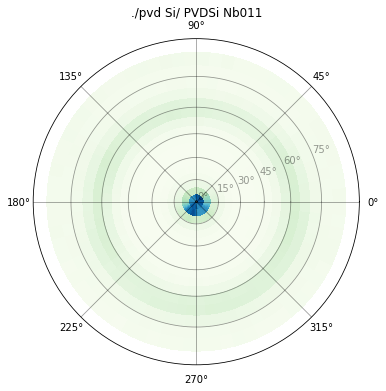

In [193]:
colormap = 'YlOrRd' if 'Cu' in filename else 'GnBu'

fig, ax = create_fig();

psi = np.arange(0, 85+1, 5)
psi_stereo = 2*np.tan(psi*np.pi/180 / 2) # Stereographic projection
#phi = np.arange(2.5, 360+1, 5)
phi_padded = np.arange(0, 361+5, 5)
ax.pcolormesh(phi_padded*np.pi/180, psi_stereo, data_corrected.T,
              cmap=colormap, shading='flat')#'gouraud')
#plt.colorbar(im, cax=ax)
plt.title(filename.replace('.csv', '').replace('FigurePole', '').replace('_', ' '))
ax.grid(True, alpha=0.4, color='black')



In [156]:
np.max(data_corrected), np.min(data_corrected)

(1.1487019018568763, 0.0)

In [158]:
1.1487019018568763*0.87

0.9993706546154824

In [73]:
y = x.T

In [75]:
y.shape

(4,)